# Motivation

Unsupervised learning или обучение без учителя используется в том случае, если у нас есть данные, но нет таргета, или мы хотим проанализировать данные на наличие каких-либо закономерностей. К примеру, какие-либо подгруппы в данных, которые будут найдены по тем или иным общим признакам. 

Примеры использования довольно обширны: 
* соцсети, когда у нас есть много юзеров, но мы не знаем каким образом они связаны. При использовании данного алгоритма мы можем сгруппировать их по интересам, по общим друзьям и т.д.

* таргетированная реклама по анализу просмотренных страниц и использования поиска.

* при анализе фотографий в астрофизике, для поиска закономерностей звездного неба. Скажем, по светимости, по расстоянию от нас - скорость движения в небе в засимости от времени суток и года. 

К минусам обучения без учителя можно отнести субъективность анализа, и сложность интерпретации, т.к. мы не знаем точного ответа. 


## Principal component analysis (PCA)

По русски известен как метод главных компонент

Один из основных способов уменьшить размерность данных потеряв наименьшее количество информации. Это очень важно, если у нас много характеристик у данных и нам сложно их анализировать из-за невозможности визуализации. 



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Clustering: K-means

In [3]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

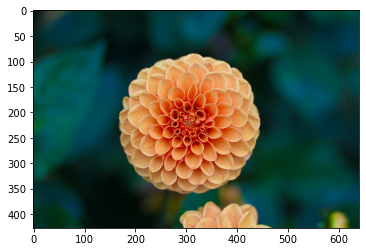

In [8]:
flower = load_sample_image('flower.jpg')

#нормировка изображения
flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower)

In [9]:
#конвертируем наш рисунок в 2D матрицу
w, h, d = original_shape = tuple(flower.shape)
#здесь d - это depth, т.к. рисунок состоит из RGB у нас он будет равен 3 
assert d == 3

image_array = np.reshape(flower, (w*h, d))

In [29]:
image_sample = shuffle(image_array, random_state = 42)[:1000]

# fit KMeans
n_colors = 64
kmeans = KMeans(n_clusters = n_colors, random_state=42).fit(image_sample)

#Get color indices
labels = kmeans.predict(image_array)

In [23]:
# now we need to write a function that rebuild our image
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

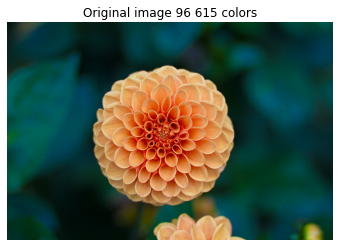

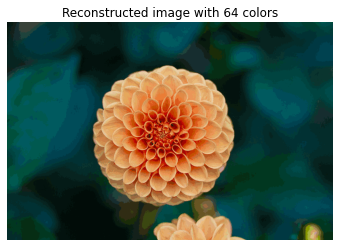

In [30]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image 96 615 colors')
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))

Как видим, рисунок был перерисован с меньшим числом цветов используя машинное обучение!


## Principal Component Analysis (PCA)

Мы будем использова PCA для уменьшения параметров рисунка

In [31]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [32]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [34]:
#n_components = 2 для двумерного изображения
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [35]:
print(f'explained variance ratio from PCA: {pca.explained_variance_ratio_}')

explained variance ratio from PCA: [0.92461872 0.05306648]


In [36]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw = 2

Text(0.5, 1.0, 'PCA of Iris Dataset')

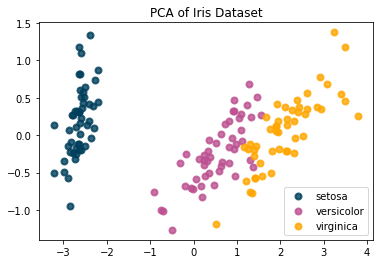

In [37]:
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris Dataset')